# Uppgift 1 - **Data Science**

Till denna uppgift har jag valt att använda mig av datasetet *House Prices*. Jag kommer att skapa en modell för att kunna jämföra data settets huspriser med förutsagda huspriser.

Jag valde detta dataset då jag kände att det var lättförståeligt men även för det var en bra mängd data att leka runt med.

In [12]:
import pandas as pd
import numpy as np

In [13]:
house_data = pd.read_csv('./data/Chennai.csv')
house_data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [14]:
house_data.shape

(5014, 40)

In [15]:
house_data.dtypes

Price                   int64
Area                    int64
Location               object
No. of Bedrooms         int64
Resale                  int64
MaintenanceStaff        int64
Gymnasium               int64
SwimmingPool            int64
LandscapedGardens       int64
JoggingTrack            int64
RainWaterHarvesting     int64
IndoorGames             int64
ShoppingMall            int64
Intercom                int64
SportsFacility          int64
ATM                     int64
ClubHouse               int64
School                  int64
24X7Security            int64
PowerBackup             int64
CarParking              int64
StaffQuarter            int64
Cafeteria               int64
MultipurposeRoom        int64
Hospital                int64
WashingMachine          int64
Gasconnection           int64
AC                      int64
Wifi                    int64
Children'splayarea      int64
LiftAvailable           int64
BED                     int64
VaastuCompliant         int64
Microwave 

Med hjälp av dtypes så kollar jag vad alla kolumner är för datatyp. Alla verkar vara av typen int64 förutom en *Location*. För denna uppgift så är det inget jag behöver oroa mig över eller fixa till då jag inte kommer att använda mig av *Location*.

In [16]:
house_data.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


Kör en isnull för att kolla så att alla kolumner har ett värdet och att det inte finns någon med nullvärden. Alla kolumner verkar dock ha värden, vilket är bra.

In [17]:
house_data.dtypes

Price                   int64
Area                    int64
Location               object
No. of Bedrooms         int64
Resale                  int64
MaintenanceStaff        int64
Gymnasium               int64
SwimmingPool            int64
LandscapedGardens       int64
JoggingTrack            int64
RainWaterHarvesting     int64
IndoorGames             int64
ShoppingMall            int64
Intercom                int64
SportsFacility          int64
ATM                     int64
ClubHouse               int64
School                  int64
24X7Security            int64
PowerBackup             int64
CarParking              int64
StaffQuarter            int64
Cafeteria               int64
MultipurposeRoom        int64
Hospital                int64
WashingMachine          int64
Gasconnection           int64
AC                      int64
Wifi                    int64
Children'splayarea      int64
LiftAvailable           int64
BED                     int64
VaastuCompliant         int64
Microwave 

In [18]:
house_data.shape

(5014, 40)

In [19]:
house_data.corr()

C:\Users\alana\AppData\Local\Temp\ipykernel_41532\893241042.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  house_data.corr()


,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Price,1.000000,0.443300,0.313354,0.076791,0.038247,0.050549,0.049768,0.047867,0.040089,0.041836,...,0.042119,0.038284,0.041234,0.038655,0.037253,0.037916,0.038605,0.039125,0.037253,0.038052
Area,0.443300,1.000000,0.762273,0.089773,0.062732,0.079353,0.078539,0.075015,0.071385,0.070967,...,0.067949,0.061839,0.068258,0.062170,0.061591,0.061395,0.061639,0.062360,0.061591,0.061334
No. of Bedrooms,0.313354,0.762273,1.000000,0.075666,0.057162,0.067741,0.066752,0.067154,0.062732,0.062883,...,0.060941,0.056882,0.060373,0.057233,0.056076,0.056958,0.057581,0.057427,0.056076,0.057085
Resale,0.076791,0.089773,0.075666,1.000000,-0.023610,-0.025426,-0.021378,-0.022927,-0.024057,-0.022804,...,-0.026364,-0.023786,-0.019173,-0.024367,-0.024545,-0.025012,-0.025217,-0.024160,-0.024545,-0.025465
MaintenanceStaff,0.038247,0.062732,0.057162,-0.023610,1.000000,0.996905,0.997185,0.997716,0.997512,0.997710,...,0.996926,0.999600,0.998313,0.999656,0.999775,0.999357,0.999294,0.999625,0.999775,0.999357
Gymnasium,0.050549,0.079353,0.067741,-0.025426,0.996905,1.000000,0.998492,0.997735,0.997905,0.997481,...,0.995933,0.996869,0.996933,0.996907,0.996897,0.996263,0.996314,0.996909,0.996897,0.996337
SwimmingPool,0.049768,0.078539,0.066752,-0.021378,0.997185,0.998492,1.000000,0.997703,0.997675,0.997776,...,0.995924,0.997047,0.997202,0.997185,0.997155,0.996631,0.996697,0.997205,0.997155,0.996704
LandscapedGardens,0.047867,0.075015,0.067154,-0.022927,0.997716,0.997735,0.997703,1.000000,0.998221,0.997751,...,0.995612,0.997623,0.997432,0.997553,0.997640,0.997097,0.997061,0.997528,0.997640,0.997117
JoggingTrack,0.040089,0.071385,0.062732,-0.024057,0.997512,0.997905,0.997675,0.998221,1.000000,0.998115,...,0.995312,0.997441,0.997636,0.997394,0.997537,0.996905,0.996867,0.997367,0.997537,0.996946
RainWaterHarvesting,0.041836,0.070967,0.062883,-0.022804,0.997710,0.997481,0.997776,0.997751,0.998115,1.000000,...,0.995922,0.997412,0.997935,0.997507,0.997635,0.997019,0.997003,0.997481,0.997635,0.997080


Jag kör en corr() för att ta reda på hur priset korrelerar med andra funktioner av huset. De tre första är dem med den bäst korrelationen till priset, alltså 'Area', 'No. of Bedrooms' och 'Resale'. En korrelation som jag ändå tycker var ganska så förväntad. Det räcker med att man tänker logiskt, ju mer yta och desto flera sovrum som finns ju högre blir då priset.

In [20]:
house_data.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [21]:
house_data.rename(columns={"No. of Bedrooms":"SumBedrooms"}, inplace=True)

In [22]:
house_data.dtypes

Price                   int64
Area                    int64
Location               object
SumBedrooms             int64
Resale                  int64
MaintenanceStaff        int64
Gymnasium               int64
SwimmingPool            int64
LandscapedGardens       int64
JoggingTrack            int64
RainWaterHarvesting     int64
IndoorGames             int64
ShoppingMall            int64
Intercom                int64
SportsFacility          int64
ATM                     int64
ClubHouse               int64
School                  int64
24X7Security            int64
PowerBackup             int64
CarParking              int64
StaffQuarter            int64
Cafeteria               int64
MultipurposeRoom        int64
Hospital                int64
WashingMachine          int64
Gasconnection           int64
AC                      int64
Wifi                    int64
Children'splayarea      int64
LiftAvailable           int64
BED                     int64
VaastuCompliant         int64
Microwave 

Först körde jag en columns för att få en bättre överblick på exakt vilka kolumner som jag har att jobba med. Därefter har jag gjort en rename på *No. of bedrooms* för att det ska bli lättare att jobba med kolumnen. Därpå kör jag en dtypes för att säkerställa att namnbytet blev lyckat.

In [23]:
house_data.rename(columns={"SumBedrooms": "testar"}, inplace=False)

,Price,Area,Location,testar,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5009,7834999,1599,Korattur,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
5010,2408000,740,Ambattur,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
5011,5500000,1700,Pallikaranai VGP Shanti Nagar,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
5012,3400000,1599,Korattur,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [24]:
house_data.columns

Index(['Price', 'Area', 'Location', 'SumBedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [25]:
y = house_data[["Price"]] / 10000
x = house_data[["Area","SumBedrooms","Resale","CarParking"]]
print(y)
print(x)

          Price
0      550.0000
1      535.0000
2      820.5000
3     2340.0000
4     1010.0000
...         ...
5009   783.4999
5010   240.8000
5011   550.0000
5012   340.0000
5013   450.0000

[5014 rows x 1 columns]
      Area  SumBedrooms  Resale  CarParking
0     1310            3       0           0
1     1126            2       0           0
2     1307            3       0           1
3     3600            3       0           0
4     1700            3       0           0
...    ...          ...     ...         ...
5009  1599            3       0           9
5010   740            2       0           9
5011  1700            3       0           9
5012  1599            3       0           9
5013   688            2       0           9

[5014 rows x 4 columns]


Skapar upp två olika varibler, x och y. Där x består av de egenskapskolumnerna som jag valt att använda mig av i denna uppgift. Y variabel består av priset, väljer även att skala ner priset för att lättare kunna arbeta med datan, men även för att det ska gå snabbare. Resterande kolumner har jag alltså valt att slopa.

In [26]:
from sklearn.model_selection import train_test_split                    

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7)

För att kunna dela upp datan i olika train ocg test set så importerar jag train_test_split.



Jag delar dårpå upp x och y i varsin *train* och *test* datasets. X och y inuti parantesen innehåller datan som jag specificerat högre upp.



x --> Area, SumBedrooms, Resale .....



y --> Price



Sedan så specificerar jag att 70% av datan ska vara i respektive x_ och y_train set och resterande 30% i x_ och y_test setten.

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3509, 4)
(1505, 4)
(3509, 1)
(1505, 1)


In [29]:
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression().fit(x_train, y_train)
y_test_pred = lin_reg.predict(x_test)

Genom att importera LinearRegression så får jag tillgång till fit() för att kunna anpassa modellen med hjälp av x_ och y_train. Man kan säga att den tränar modellen utifrån x_ och y_train värderna. Där x_train innehåller alla egenskaper i huset från datasetet och y_train innehåller priskolumnen.

Efter att modellen har *tränats* så vill vi nu förutse värdet för x_test. Det har jag gjort genom att använda modellen som jag precis byggt, "lin_reg". Som i sin tur sedan lagrar sina värden i varibeln "y_test_pred" och vilka värden modellen än förutser för x_test så kommer det att lagaras i varibeln "y_test_pred".  

In [30]:
import matplotlib.pyplot as plt

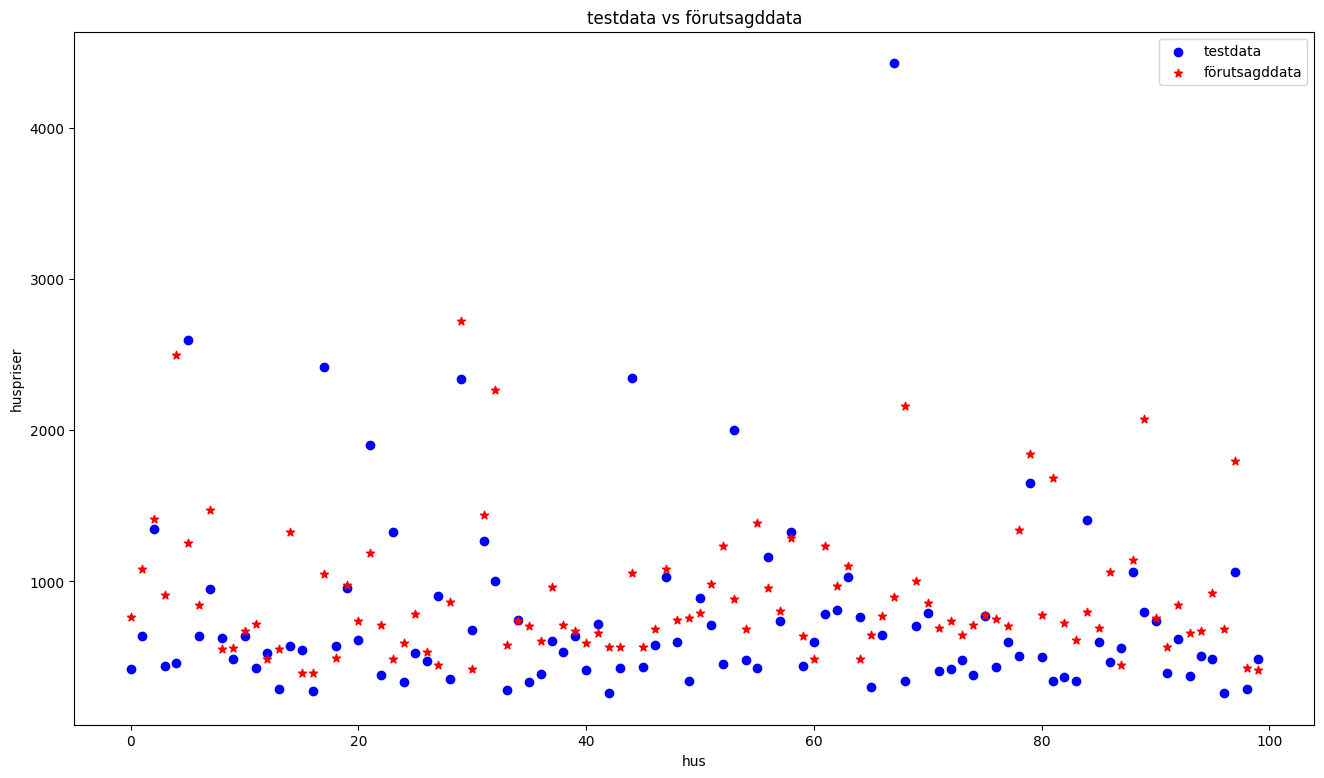

In [31]:
plt.figure(figsize=(16,9))
plt.scatter(range(len(y_test[:100])),y_test[:100], color="blue", label="testdata")
plt.scatter(range(len(y_test_pred[:100])), y_test_pred[:100], color="red",marker="*", label="förutsagddata" )
plt.xlabel("hus")
plt.ylabel("huspriser")
plt.title("testdata vs förutsagddata")
plt.legend()
plt.show()


Med hjälp av pyplot från matplotlib så skapar jag är en visualisering av sluttresultatet.



De blåa cirklarna är testdatan vilket är ursprungsvärdet och de röda stjärnorna är den berkänade datans värden.

In [32]:
check_y = y_test

type(check_y)

check_y['Predicted Price'] = y_test_pred

check_y.head(50)

,Price,Predicted Price
73,419.2000,763.877024
87,640.9999,1085.465203
1329,1350.0000,1414.603156
2761,443.1000,907.988050
2944,463.5000,2500.405032
1890,2600.0000,1255.197122
921,639.5000,844.712790
81,950.0000,1473.340005
3379,628.6000,555.445514
4322,490.0000,557.910556



För att förtydliga sluttresultatet printar jag även ut det så här.



In [34]:
y_new_pred = lin_reg.predict([[2200,4,0,0]])

y_new_pred

c:\Users\alana\OneDrive\Skrivbord\uppgift1\.env\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1478.79489879]])